## MLPRegressor forecast

Ez egy olyan kis program és osztály lesz ami képes autoregresszív előrejelzést csinálni. Ennyi és semmi több.

In [48]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [217]:
x = np.arange(0, 501, 1)

y = np.sin(x/180) + np.sin(x/60)

x = x.reshape(-1,1)
y = y

In [221]:
np.savetxt("sinus.csv", y, delimiter=",")

In [218]:
class Forecast():
  def __init__(self):
    self.mlp = MLPRegressor(hidden_layer_sizes=(3, ),
                            activation='tanh', 
                            solver='sgd',
                            batch_size='auto',
                            learning_rate_init=0.01,
                            max_iter=2000,
                            shuffle=False,
                            random_state=1,
                            momentum=0.9,
                            nesterovs_momentum=True,
                            early_stopping=True,
                            n_iter_no_change=2000)
    
    self.scaler_x_one = MinMaxScaler(feature_range=(-1,1))
    self.scaler_y_one = MinMaxScaler(feature_range=(-1,1))
    
  def forecast(self, _x = x, _y = y, lag = 1, forecast = 10):

    # Reshape y
    _y = y.reshape(-1,1)

    print('lag = ', lag)
    print('_x.shape = ', _x.shape)
    print('_y.shape = ', _y.shape)
    print('---------------------')
    
    # Normalizáció

    # Ami érdekesség lesz itt, hogy az x változót nem is használjuk sehol
    # ez olyan mind az id, csak az eredeti sorrendet jelöli
    

    # x_scaled = self.scaler_x_one.fit_transform(_x)
    y_scaled = self.scaler_y_one.fit_transform(_y)

    # Visszakérjük az új célváltozót és annak a lag tömbjét

    _y, _Y = self.create_lag(y_scaled, lag)

    # Rövídíteni kell az x-et is
    _x = _x[lag:,:]

    print('_Y.min = ', _Y.min())
    print('_Y.max = ', _Y.max())
    print('_y.min = ', _y.min())
    print('_y.max = ', _y.max())
    print('_Y.shape = ', _Y.shape)
    print('_y.shape = ', _y.shape)
    # print('_Y = \n', _Y)
    # print('_y = \n', _y)

    # Tanítás

    self.mlp.fit(_Y, _y)

    predicted = self.mlp.predict(_Y)

    # Plottolás eredeti és tanított

    plt.scatter(_x, _y)
    plt.plot(_x, predicted, c='black')
    plt.show()

    # Forecast

    f = forecast
    forecasted = predicted.copy()                    # ehhez fogom majd hozzáadni az értékekekt
    forecasted_x = _x.copy()                         # ez a megjelenítéshez kell hogy a teljes becsléssel azonos hosszú tömb legyen
    __Y = _Y.copy()                                  # ezt fogjuk módosítani
    # először a feltanított modell alapján csináljon egy becslést az utolsó értékre
    last_Y = __Y[-1,:].reshape(1,-1)
    print('last_Y = \n', last_Y)
    print('last_Y.shape = ', last_Y.shape)
#    last_prediction = self.mlp.predict(last_Y)
#    print('last_prediction = ', last_prediction)
    # hozzáadjuk a becsült értéket a forecastedhez
#    forecasted = np.append(forecasted, last_prediction)
#    print('forecasted last 6 element = \n', forecasted[-6:])
    # az utolsó elemet hozzá kéne csapni last_Y-hoz
    # és ki venni annak első elemét
#    last_Y = np.append(last_Y, last_prediction)
#    last_Y = last_Y[-lag:].reshape(1,-1)
    print('last_Y = \n', last_Y)
#    last_prediction = self.mlp.predict(last_Y)
#    print('last_prediction = ', last_prediction)

    for i in range(f):
      print('# i = ', i)
      print('last_Y = \n', last_Y)
      print('last_Y.shape = ', last_Y.shape)
      last_prediction = self.mlp.predict(last_Y)
      print('last_prediction = ', last_prediction)
      # hozzáadjuk a becsült értéket a forecastedhez
      forecasted = np.append(forecasted, last_prediction)
      print('forecasted last 6 element = \n', forecasted[-6:])
      # az utolsó elemet hozzá kéne csapni last_Y-hoz
      # és ki venni annak első elemét
      last_Y = np.append(last_Y, last_prediction)
      last_Y = last_Y[-lag:].reshape(1,-1)
      print('last_Y = \n', last_Y)
      # a megjelenítéshez kell
      forecasted_x = np.append(forecasted_x, forecasted_x.max()+1)

      print(forecasted_x.shape)
      print(forecasted.shape)
    
    # Plot forecasted 
      plt.scatter(_x, _y)
      plt.plot(_x, predicted, c='black')
      plt.plot(forecasted_x, forecasted, c='red')
      plt.show()





  def create_lag(self, input, lag = 1):
    # Csiálunk egy üres töbmöt ebben töltjük majd fel a visszatérő többmel
    # sorainak a száma annyival kevesebb ahány lag van
    # oszlopainak a száma annyi ahány lag van
    y_lags = np.zeros((input.shape[0]-lag, lag))
    for i in range(lag):
      y_lag = np.roll(input, -i)
      # vágjuk le a tömb elejét annyit ahány lag van
      y_lag = y_lag[:-lag,:]
      # adjuk hozzá az x_lags-s tömb megfelelő oszlopához
      y_lags[:,i] = y_lag.ravel()
    # Visszaadjuk az eredeti x tömböt is de szintén csökkentjük a laggel
    y_cut = input[lag:,:]
    return y_cut, y_lags


lag =  2
_x.shape =  (501, 1)
_y.shape =  (501, 1)
---------------------
_Y.min =  -1.0
_Y.max =  0.9999999999999998
_y.min =  -0.9999894352716657
_y.max =  0.9999999999999998
_Y.shape =  (499, 2)
_y.shape =  (499, 1)


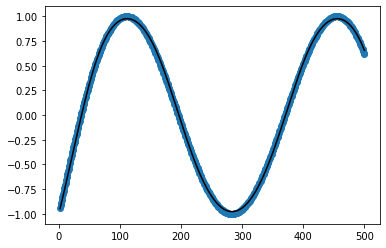

last_Y = 
 [[0.64767506 0.63145021]]
last_Y.shape =  (1, 2)
last_Y = 
 [[0.64767506 0.63145021]]
# i =  0
last_Y = 
 [[0.64767506 0.63145021]]
last_Y.shape =  (1, 2)
last_prediction =  [0.65483806]
forecasted last 6 element = 
 [0.71446846 0.70021373 0.68552498 0.67040025 0.65483806 0.65483806]
last_Y = 
 [[0.63145021 0.65483806]]
(500,)
(500,)


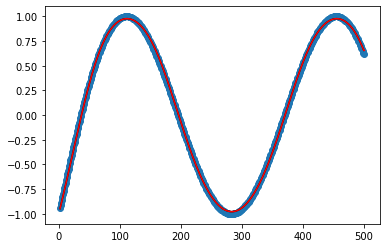

# i =  1
last_Y = 
 [[0.63145021 0.65483806]]
last_Y.shape =  (1, 2)
last_prediction =  [0.67862265]
forecasted last 6 element = 
 [0.70021373 0.68552498 0.67040025 0.65483806 0.65483806 0.67862265]
last_Y = 
 [[0.65483806 0.67862265]]
(501,)
(501,)


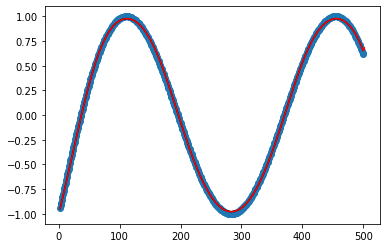

# i =  2
last_Y = 
 [[0.65483806 0.67862265]]
last_Y.shape =  (1, 2)
last_prediction =  [0.70113385]
forecasted last 6 element = 
 [0.68552498 0.67040025 0.65483806 0.65483806 0.67862265 0.70113385]
last_Y = 
 [[0.67862265 0.70113385]]
(502,)
(502,)


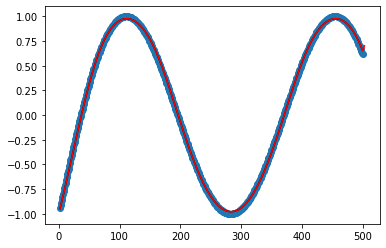

# i =  3
last_Y = 
 [[0.67862265 0.70113385]]
last_Y.shape =  (1, 2)
last_prediction =  [0.72215476]
forecasted last 6 element = 
 [0.67040025 0.65483806 0.65483806 0.67862265 0.70113385 0.72215476]
last_Y = 
 [[0.70113385 0.72215476]]
(503,)
(503,)


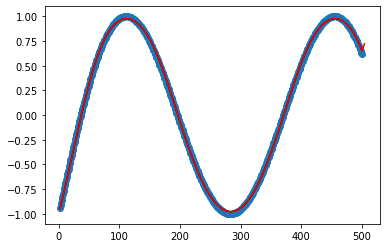

# i =  4
last_Y = 
 [[0.70113385 0.72215476]]
last_Y.shape =  (1, 2)
last_prediction =  [0.74156207]
forecasted last 6 element = 
 [0.65483806 0.65483806 0.67862265 0.70113385 0.72215476 0.74156207]
last_Y = 
 [[0.72215476 0.74156207]]
(504,)
(504,)


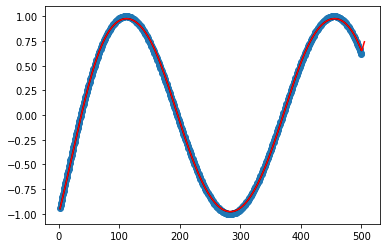

# i =  5
last_Y = 
 [[0.72215476 0.74156207]]
last_Y.shape =  (1, 2)
last_prediction =  [0.7592831]
forecasted last 6 element = 
 [0.65483806 0.67862265 0.70113385 0.72215476 0.74156207 0.7592831 ]
last_Y = 
 [[0.74156207 0.7592831 ]]
(505,)
(505,)


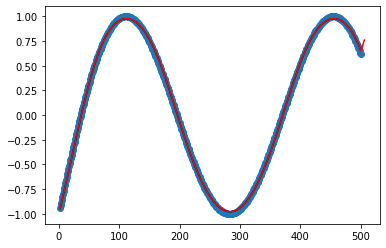

# i =  6
last_Y = 
 [[0.74156207 0.7592831 ]]
last_Y.shape =  (1, 2)
last_prediction =  [0.77529371]
forecasted last 6 element = 
 [0.67862265 0.70113385 0.72215476 0.74156207 0.7592831  0.77529371]
last_Y = 
 [[0.7592831  0.77529371]]
(506,)
(506,)


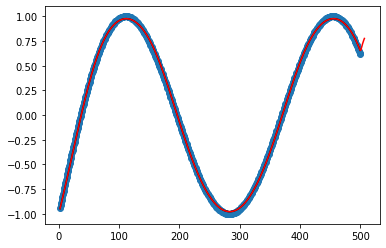

# i =  7
last_Y = 
 [[0.7592831  0.77529371]]
last_Y.shape =  (1, 2)
last_prediction =  [0.78961452]
forecasted last 6 element = 
 [0.70113385 0.72215476 0.74156207 0.7592831  0.77529371 0.78961452]
last_Y = 
 [[0.77529371 0.78961452]]
(507,)
(507,)


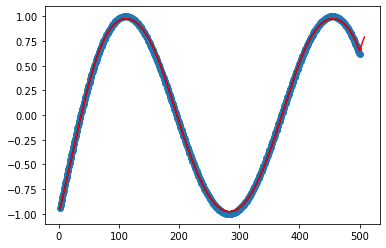

# i =  8
last_Y = 
 [[0.77529371 0.78961452]]
last_Y.shape =  (1, 2)
last_prediction =  [0.80230441]
forecasted last 6 element = 
 [0.72215476 0.74156207 0.7592831  0.77529371 0.78961452 0.80230441]
last_Y = 
 [[0.78961452 0.80230441]]
(508,)
(508,)


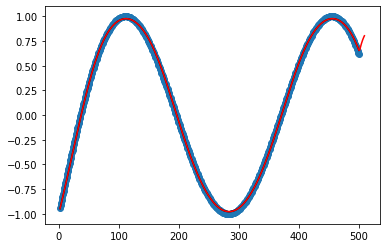

# i =  9
last_Y = 
 [[0.78961452 0.80230441]]
last_Y.shape =  (1, 2)
last_prediction =  [0.81345251]
forecasted last 6 element = 
 [0.74156207 0.7592831  0.77529371 0.78961452 0.80230441 0.81345251]
last_Y = 
 [[0.80230441 0.81345251]]
(509,)
(509,)


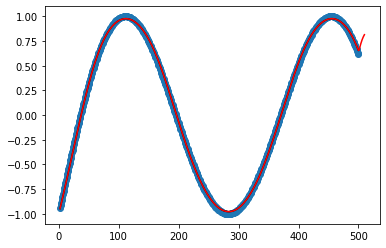

# i =  10
last_Y = 
 [[0.80230441 0.81345251]]
last_Y.shape =  (1, 2)
last_prediction =  [0.82316963]
forecasted last 6 element = 
 [0.7592831  0.77529371 0.78961452 0.80230441 0.81345251 0.82316963]
last_Y = 
 [[0.81345251 0.82316963]]
(510,)
(510,)


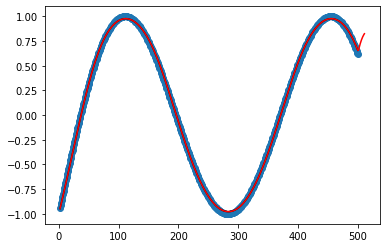

# i =  11
last_Y = 
 [[0.81345251 0.82316963]]
last_Y.shape =  (1, 2)
last_prediction =  [0.83157995]
forecasted last 6 element = 
 [0.77529371 0.78961452 0.80230441 0.81345251 0.82316963 0.83157995]
last_Y = 
 [[0.82316963 0.83157995]]
(511,)
(511,)


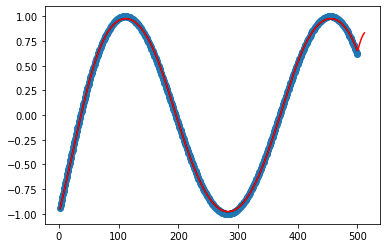

# i =  12
last_Y = 
 [[0.82316963 0.83157995]]
last_Y.shape =  (1, 2)
last_prediction =  [0.83881376]
forecasted last 6 element = 
 [0.78961452 0.80230441 0.81345251 0.82316963 0.83157995 0.83881376]
last_Y = 
 [[0.83157995 0.83881376]]
(512,)
(512,)


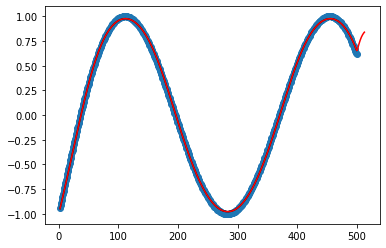

# i =  13
last_Y = 
 [[0.83157995 0.83881376]]
last_Y.shape =  (1, 2)
last_prediction =  [0.8450014]
forecasted last 6 element = 
 [0.80230441 0.81345251 0.82316963 0.83157995 0.83881376 0.8450014 ]
last_Y = 
 [[0.83881376 0.8450014 ]]
(513,)
(513,)


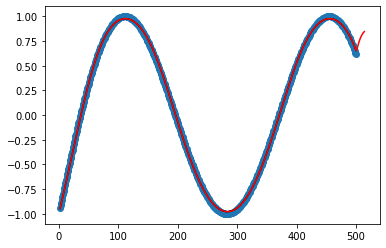

# i =  14
last_Y = 
 [[0.83881376 0.8450014 ]]
last_Y.shape =  (1, 2)
last_prediction =  [0.85026873]
forecasted last 6 element = 
 [0.81345251 0.82316963 0.83157995 0.83881376 0.8450014  0.85026873]
last_Y = 
 [[0.8450014  0.85026873]]
(514,)
(514,)


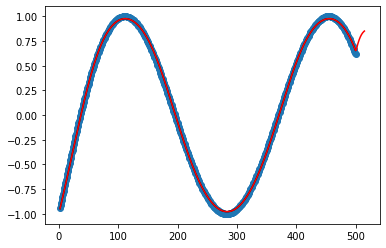

# i =  15
last_Y = 
 [[0.8450014  0.85026873]]
last_Y.shape =  (1, 2)
last_prediction =  [0.85473397]
forecasted last 6 element = 
 [0.82316963 0.83157995 0.83881376 0.8450014  0.85026873 0.85473397]
last_Y = 
 [[0.85026873 0.85473397]]
(515,)
(515,)


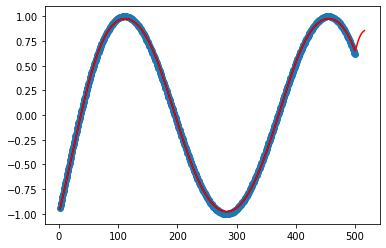

# i =  16
last_Y = 
 [[0.85026873 0.85473397]]
last_Y.shape =  (1, 2)
last_prediction =  [0.85850568]
forecasted last 6 element = 
 [0.83157995 0.83881376 0.8450014  0.85026873 0.85473397 0.85850568]
last_Y = 
 [[0.85473397 0.85850568]]
(516,)
(516,)


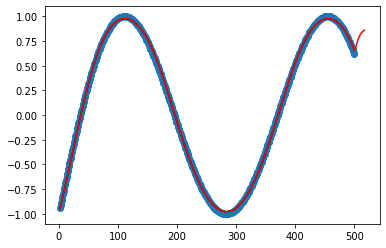

# i =  17
last_Y = 
 [[0.85473397 0.85850568]]
last_Y.shape =  (1, 2)
last_prediction =  [0.86168181]
forecasted last 6 element = 
 [0.83881376 0.8450014  0.85026873 0.85473397 0.85850568 0.86168181]
last_Y = 
 [[0.85850568 0.86168181]]
(517,)
(517,)


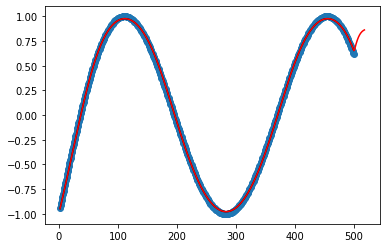

# i =  18
last_Y = 
 [[0.85850568 0.86168181]]
last_Y.shape =  (1, 2)
last_prediction =  [0.86434941]
forecasted last 6 element = 
 [0.8450014  0.85026873 0.85473397 0.85850568 0.86168181 0.86434941]
last_Y = 
 [[0.86168181 0.86434941]]
(518,)
(518,)


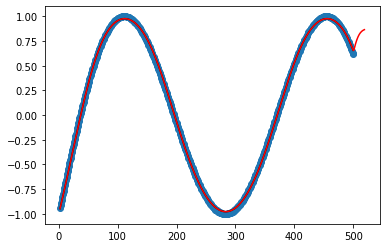

# i =  19
last_Y = 
 [[0.86168181 0.86434941]]
last_Y.shape =  (1, 2)
last_prediction =  [0.86658493]
forecasted last 6 element = 
 [0.85026873 0.85473397 0.85850568 0.86168181 0.86434941 0.86658493]
last_Y = 
 [[0.86434941 0.86658493]]
(519,)
(519,)


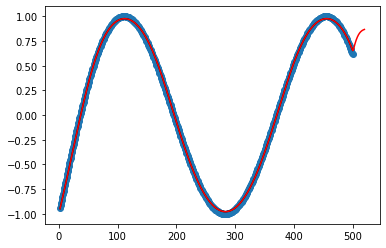

# i =  20
last_Y = 
 [[0.86434941 0.86658493]]
last_Y.shape =  (1, 2)
last_prediction =  [0.86845487]
forecasted last 6 element = 
 [0.85473397 0.85850568 0.86168181 0.86434941 0.86658493 0.86845487]
last_Y = 
 [[0.86658493 0.86845487]]
(520,)
(520,)


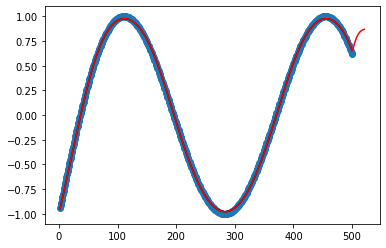

# i =  21
last_Y = 
 [[0.86658493 0.86845487]]
last_Y.shape =  (1, 2)
last_prediction =  [0.87001653]
forecasted last 6 element = 
 [0.85850568 0.86168181 0.86434941 0.86658493 0.86845487 0.87001653]
last_Y = 
 [[0.86845487 0.87001653]]
(521,)
(521,)


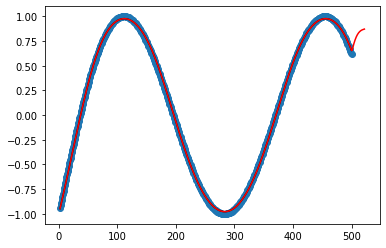

# i =  22
last_Y = 
 [[0.86845487 0.87001653]]
last_Y.shape =  (1, 2)
last_prediction =  [0.87131901]
forecasted last 6 element = 
 [0.86168181 0.86434941 0.86658493 0.86845487 0.87001653 0.87131901]
last_Y = 
 [[0.87001653 0.87131901]]
(522,)
(522,)


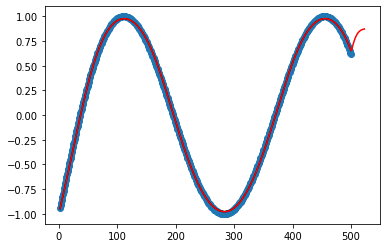

# i =  23
last_Y = 
 [[0.87001653 0.87131901]]
last_Y.shape =  (1, 2)
last_prediction =  [0.87240412]
forecasted last 6 element = 
 [0.86434941 0.86658493 0.86845487 0.87001653 0.87131901 0.87240412]
last_Y = 
 [[0.87131901 0.87240412]]
(523,)
(523,)


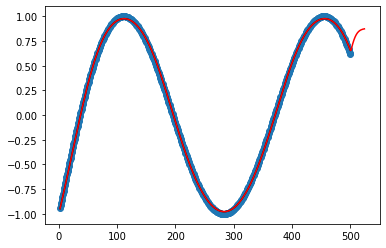

# i =  24
last_Y = 
 [[0.87131901 0.87240412]]
last_Y.shape =  (1, 2)
last_prediction =  [0.8733073]
forecasted last 6 element = 
 [0.86658493 0.86845487 0.87001653 0.87131901 0.87240412 0.8733073 ]
last_Y = 
 [[0.87240412 0.8733073 ]]
(524,)
(524,)


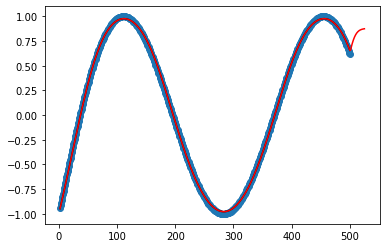

# i =  25
last_Y = 
 [[0.87240412 0.8733073 ]]
last_Y.shape =  (1, 2)
last_prediction =  [0.87405847]
forecasted last 6 element = 
 [0.86845487 0.87001653 0.87131901 0.87240412 0.8733073  0.87405847]
last_Y = 
 [[0.8733073  0.87405847]]
(525,)
(525,)


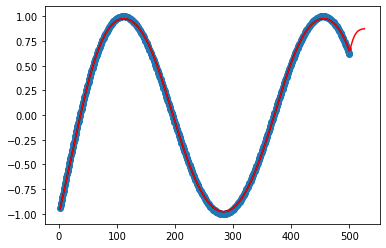

# i =  26
last_Y = 
 [[0.8733073  0.87405847]]
last_Y.shape =  (1, 2)
last_prediction =  [0.87468281]
forecasted last 6 element = 
 [0.87001653 0.87131901 0.87240412 0.8733073  0.87405847 0.87468281]
last_Y = 
 [[0.87405847 0.87468281]]
(526,)
(526,)


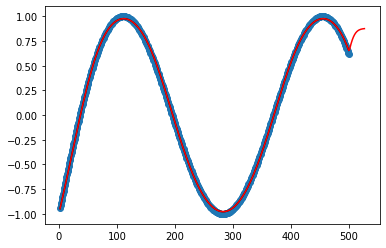

# i =  27
last_Y = 
 [[0.87405847 0.87468281]]
last_Y.shape =  (1, 2)
last_prediction =  [0.87520145]
forecasted last 6 element = 
 [0.87131901 0.87240412 0.8733073  0.87405847 0.87468281 0.87520145]
last_Y = 
 [[0.87468281 0.87520145]]
(527,)
(527,)


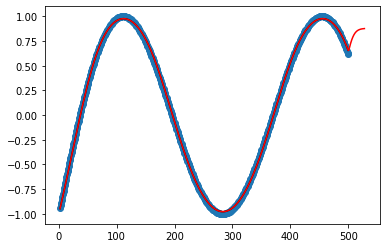

# i =  28
last_Y = 
 [[0.87468281 0.87520145]]
last_Y.shape =  (1, 2)
last_prediction =  [0.8756321]
forecasted last 6 element = 
 [0.87240412 0.8733073  0.87405847 0.87468281 0.87520145 0.8756321 ]
last_Y = 
 [[0.87520145 0.8756321 ]]
(528,)
(528,)


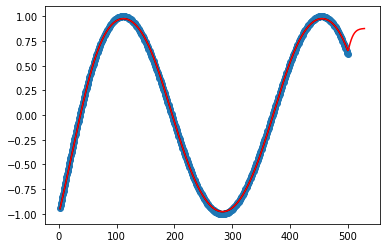

# i =  29
last_Y = 
 [[0.87520145 0.8756321 ]]
last_Y.shape =  (1, 2)
last_prediction =  [0.87598955]
forecasted last 6 element = 
 [0.8733073  0.87405847 0.87468281 0.87520145 0.8756321  0.87598955]
last_Y = 
 [[0.8756321  0.87598955]]
(529,)
(529,)


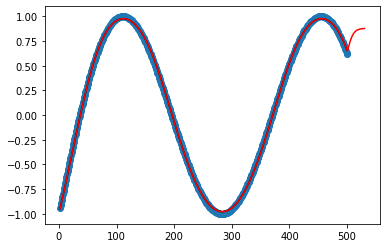

In [219]:
forecast = Forecast()

forecast.forecast(_x = x, _y = y, lag = 2, forecast = 30)

## A konklúzió az

Hogy a diff nélkül ez nem működik ami logikus is